<a href="https://colab.research.google.com/github/maniin/CNN-Glaucoma-prediction/blob/master/CNN_GLAUCOMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [194]:
!ls '/content/drive/My Drive/Glaucoma/Train/Non_Glaucoma/'

'1 (10).tif'  '1 (17).tif'  '1 (23).tif'  '1 (2).tif'	'1 (6).tif'
'1 (11).tif'  '1 (18).tif'  '1 (24).tif'  '1 (30).tif'	'1 (7).tif'
'1 (12).tif'  '1 (19).tif'  '1 (25).tif'  '1 (31).tif'	'1 (8).tif'
'1 (13).tif'  '1 (1).tif'   '1 (26).tif'  '1 (32).tif'	'1 (9).tif'
'1 (14).tif'  '1 (20).tif'  '1 (27).tif'  '1 (3).tif'
'1 (15).tif'  '1 (21).tif'  '1 (28).tif'  '1 (4).tif'
'1 (16).tif'  '1 (22).tif'  '1 (29).tif'  '1 (5).tif'


In [195]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [199]:
dim1 = []
dim2 = []
test_path = "/content/drive/My Drive/Glaucoma/Train/"
for image_filename in os.listdir(test_path+'Glaucoma'):
    img = imread(test_path+'Glaucoma'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    print(d1,d2,colors)


435 580 3
201 245 3
201 245 3
239 294 3
219 270 3
219 270 3
435 580 3
435 580 3
600 750 3
219 270 3
201 245 3
226 300 3
576 768 3
219 270 3
263 319 3
191 264 3
239 294 3
590 784 3
284 295 3
1024 1280 3
590 784 3
600 750 3
576 768 3
219 270 3
435 580 3
219 270 3
201 245 3
435 580 3
255 360 3
226 300 3
435 580 3
255 360 3


In [29]:
!ls "/content/drive/My Drive/Glaucoma/Glaucoma" | wc -l

40


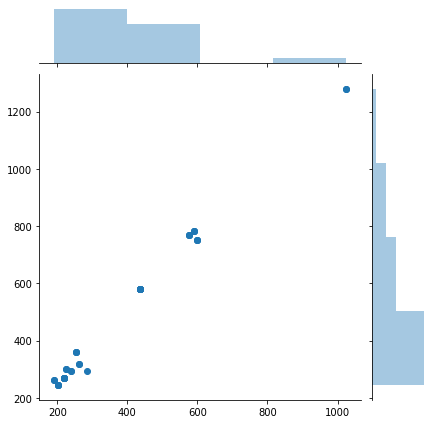

In [23]:
sns.jointplot(dim1,dim2)

In [27]:
print(np.mean(dim1))
print(np.mean(dim2))

384.9
496.375


In [175]:
dim3 = []
dim4 = []
test_path = "/content/drive/My Drive/Glaucoma/"
for image_filename in os.listdir(test_path+'Non_Glaucoma'):
    img = imread(test_path+'Non_Glaucoma'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim3.append(d1)
    dim4.append(d2)
    print(d1,d2,colors)

FileNotFoundError: ignored

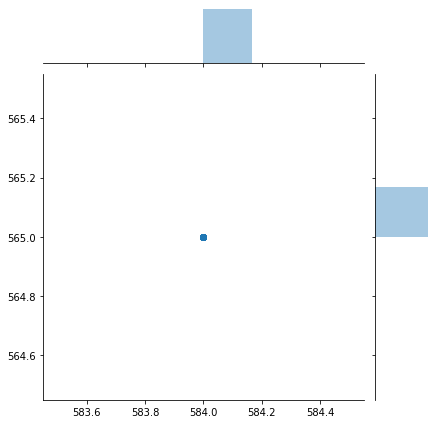

In [26]:
sns.jointplot(dim3,dim4)

In [201]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf

In [120]:
import numpy as np


class EarlyStoppingAtBothAccruacy1(tf.keras.callbacks.Callback):
    """Stop training when the accuracy of the training and validation becomes 1.

  Arguments:
      patience: Number of epochs to wait after min has been hit. After this
      number of no improvement, training stops.
  """

    def __init__(self, patience=0):
        super(EarlyStoppingAtBothAccruacy1, self).__init__()
        self.patience = patience
        # best_weights to store the weights at which the minimum loss occurs.
        self.best_weights = None

    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best as infinity.
        self.best_acc = 1.0
        self.best_val_acc = 1.0

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get("accuracy")
        current_val_accuracy = logs.get("val_accuracy")

        if np.equal(current_accuracy, 1.0) and np.equal(current_val_accuracy,1.0):
           self.stopped_epoch = epoch
           self.model.stop_training = True
           print("Restoring model weights from the end of the best epoch.")
           self.model.set_weights(self.model.get_weights())
        

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))


In [206]:



model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(400, 500, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])



In [207]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 398, 498, 32)      896       
_________________________________________________________________
activation_115 (Activation)  (None, 398, 498, 32)      0         
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 199, 249, 32)      0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 197, 247, 32)      9248      
_________________________________________________________________
activation_116 (Activation)  (None, 197, 247, 32)      0         
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 98, 123, 32)       0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 96, 121, 64)     

In [208]:
train_path = "/content/drive/My Drive/Glaucoma/Train"
test_path = "/content/drive/My Drive/Glaucoma/Test"

In [124]:
#from tensorflow.keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='loss',patience=3,restore_best_weights=True, mode= 'min')

In [210]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,        
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'train_path', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_path,  # this is the target directory
        target_size=(400, 500),  # all images will be resized to 584x565
        batch_size=batch_size,
        shuffle = False,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(400, 500),
        batch_size=batch_size,
        shuffle = False,
        class_mode='binary')

model.fit_generator(
        train_generator,
        #steps_per_epoch=32 // batch_size,
        epochs=40,
        validation_data=validation_generator,
        #validation_steps=8 // batch_size
        #callbacks =[ EarlyStoppingAtBothAccruacy1()]
         )
model.save_weights('FineTuned.h5')  # always save your weights after training or during training

from tensorflow.keras.models import load_model
model.save('Glaucoma_predict.h5')

Found 64 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/40
4/4 [==============================] - 15s 4s/step - loss: 8.0063 - accuracy: 0.4219 - val_loss: 1.0895 - val_accuracy: 0.5000
Epoch 2/40
4/4 [==============================] - 14s 3s/step - loss: 1.4826 - accuracy: 0.4219 - val_loss: 0.7810 - val_accuracy: 0.5000
Epoch 3/40
4/4 [==============================] - 14s 3s/step - loss: 0.7761 - accuracy: 0.5156 - val_loss: 0.6397 - val_accuracy: 0.8750
Epoch 4/40
4/4 [==============================] - 14s 3s/step - loss: 0.7313 - accuracy: 0.5156 - val_loss: 0.6415 - val_accuracy: 0.6250
Epoch 5/40
4/4 [==============================] - 14s 3s/step - loss: 0.6537 - accuracy: 0.5781 - val_loss: 0.5851 - val_accuracy: 0.9375
Epoch 6/40
4/4 [==============================] - 14s 3s/step - loss: 0.5941 - accuracy: 0.6719 - val_loss: 0.5154 - val_accuracy: 0.9375
Epoch 7/40
4/4 [==============================] - 14s 3s/step - loss: 0.4708 - accuracy: 0.8

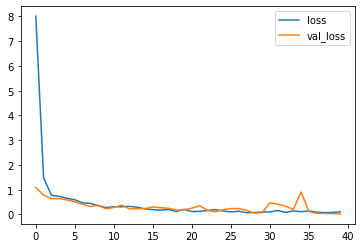

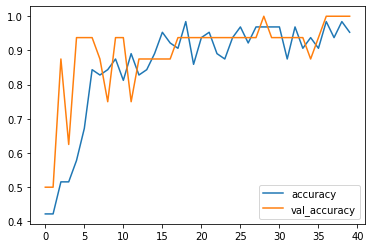

In [211]:
losses = pd.DataFrame(model.history.history)
losses [['loss','val_loss']].plot()
losses [['accuracy','val_accuracy']].plot()

In [212]:
model.evaluate(validation_generator)

1/1 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 1.0000


[0.02204936556518078, 1.0]

In [213]:
from tensorflow.keras.preprocessing import image

In [214]:
pred_prob = model.predict(validation_generator)
pred_prob

array([[1.6130179e-02],
       [6.6003203e-04],
       [6.5080982e-05],
       [2.5066733e-04],
       [4.1074157e-03],
       [8.4946066e-02],
       [2.9347926e-02],
       [1.1990845e-02],
       [9.9995720e-01],
       [8.2906455e-01],
       [9.9822736e-01],
       [9.9825346e-01],
       [9.9800944e-01],
       [9.9991953e-01],
       [9.9970931e-01],
       [9.9260032e-01]], dtype=float32)

In [215]:
print(validation_generator)

In [216]:
y_pred = model.predict_classes(validation_generator)
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [222]:
predictions = np.round(np.amax(pred_prob, axis=1) ).astype(int)

In [220]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [223]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(validation_generator.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [224]:
confusion_matrix(validation_generator.classes,predictions)

array([[8, 0],
       [0, 8]])

In [226]:
model.save('/content/drive/My Drive/Glaucoma/Glaucoma_predict.h5')

In [227]:
model.save_weights('/content/drive/My Drive/Glaucoma/Glaucoma_model_weight.h5')